In [59]:
import chardet
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Ganti path sesuai lokasi folder tempat file CSV kamu berada
path = '/content/drive/MyDrive/dataset/'  # <- UBAH INI SESUAI FOLDER DI GOOGLE DRIVE

files = ['cpdg2021.csv', 'cpdg2022.csv', 'cpdg2023.csv', 'cpdg2024.csv']

for file in files:
    full_path = os.path.join(path, file)
    with open(full_path, 'rb') as f:
        result = chardet.detect(f.read(100000))
        print(f"{file}: {result['encoding']}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cpdg2021.csv: Windows-1252
cpdg2022.csv: Windows-1252
cpdg2023.csv: Windows-1252
cpdg2024.csv: Windows-1252


In [60]:
import pandas as pd
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Ganti path sesuai lokasi folder tempat file CSV kamu berada
path = '/content/drive/MyDrive/dataset/'  # <- UBAH INI SESUAI FOLDER DI GOOGLE DRIVE

files = ['cpdg2021.csv', 'cpdg2022.csv', 'cpdg2023.csv', 'cpdg2024.csv']
dfs = []

for file in files:
    full_path = os.path.join(path, file)
    df = pd.read_csv(full_path, encoding='windows-1252', sep=';')  # Sesuaikan jika encoding berbeda
    dfs.append(df)

# Gabungkan semua data menjadi satu DataFrame
df_final = pd.concat(dfs, ignore_index=True)

# Tampilkan beberapa baris pertama untuk memastikan data terbaca dengan benar
print(df_final.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Point Id  From Station Stored Status Solution Type Solution Optimisation  \
0     cpdg           NaN        Stored     Navigated        Iono Minimised   
1     cpdg           NaN        Stored     Navigated        Iono Minimised   
2     cpdg           NaN        Stored     Navigated        Iono Minimised   
3     cpdg           NaN        Stored     Navigated        Iono Minimised   
4     cpdg           NaN        Stored     Navigated        Iono Minimised   

  Satellite System Frequency Occupation Mode        Start Time  \
0              GPS     L1/L2          Static  01/01/2021 06:59   
1              GPS     L1/L2          Static  01/02/2021 06:59   
2              GPS     L1/L2          Static  01/03/2021 06:59   
3              GPS     L1/L2          Static  01/04/2021 06:59   
4      GPS/GLONASS     L1/L2          Static  01/05/2021 06:59   

     

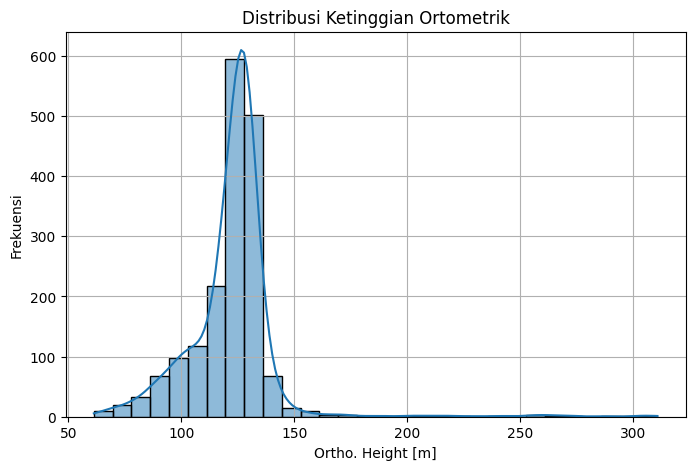

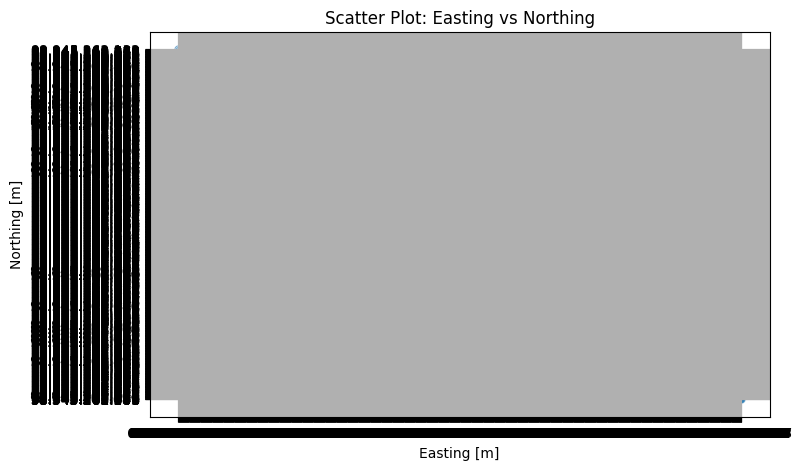

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi 1: Histogram untuk distribusi ketinggian ortometrik
plt.figure(figsize=(8, 5))
sns.histplot(df_final['Ortho. Height [m]'], bins=30, kde=True)
plt.title("Distribusi Ketinggian Ortometrik")
plt.xlabel("Ortho. Height [m]")
plt.ylabel("Frekuensi")
plt.grid()
plt.show()

# Visualisasi 2: Scatter plot untuk hubungan antara Easting dan Northing
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_final['Easting [m]'], y=df_final['Northing [m]'], alpha=0.5)
plt.title("Scatter Plot: Easting vs Northing")
plt.xlabel("Easting [m]")
plt.ylabel("Northing [m]")
plt.grid()
plt.show()


In [62]:
df.columns = df.columns.str.strip().str.replace(r'[^a-zA-Z0-9\s\[\]._-]', '', regex=True)
print("Kolom setelah dibersihkan:", df.columns)


Kolom setelah dibersihkan: Index(['Point Id', 'From Station', 'Stored Status', 'Solution Type',
       'Solution Optimisation', 'Satellite System', 'Frequency',
       'Occupation Mode', 'Start Time', 'End Time', 'Duration',
       'Antenna Height [m]', 'Antenna Name', 'Ephemeris Type', 'Easting [m]',
       'Northing [m]', 'Ortho. Height [m]', 'Geoid Separation [m]',
       'WGS84 Latitude []', 'WGS84 Longitude []', 'WGS84 Ellip. Height [m]',
       'WGS84 Cartesian X [m]', 'WGS84 Cartesian Y [m]',
       'WGS84 Cartesian Z [m]', 'x [m]', 'y [m]', 'z [m]', 'Slope Dist. [m]',
       'SD Slope Dist. [m]'],
      dtype='object')


In [63]:
df = df[['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []',
         'Easting [m]', 'Northing [m]', 'Ortho. Height [m]',
         'WGS84 Ellip. Height [m]', 'Geoid Separation [m]']]


In [64]:
print(df.columns.tolist())  # Lihat semua nama kolom setelah dibersihkan


['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 'Easting [m]', 'Northing [m]', 'Ortho. Height [m]', 'WGS84 Ellip. Height [m]', 'Geoid Separation [m]']


In [65]:
print(df.columns.tolist())


['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 'Easting [m]', 'Northing [m]', 'Ortho. Height [m]', 'WGS84 Ellip. Height [m]', 'Geoid Separation [m]']


In [66]:
df = df[['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []',
         'Easting [m]', 'Northing [m]', 'Ortho. Height [m]',
         'WGS84 Ellip. Height [m]', 'Geoid Separation [m]']]


In [67]:
df.columns = df.columns.str.strip()  # Hilangkan spasi berlebih
df.columns = df.columns.str.replace(r'[^\w\s\[\]]', '', regex=True)  # Bersihkan karakter aneh
print(df.columns.tolist())  # Cek lagi nama kolom setelah dibersihkan


['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []', 'Easting [m]', 'Northing [m]', 'Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Geoid Separation [m]']


In [68]:
df = df[['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []',
         'Easting [m]', 'Northing [m]', 'Ortho Height [m]',
         'WGS84 Ellip Height [m]', 'Geoid Separation [m]']]


Penanganan Missing Values

In [69]:
import numpy as np # Make sure numpy is imported if not already

# Define the function to convert to float, handling potential errors and formats
def convert_to_float_robust(value):
    """
    Konversi angka dengan pemisah ribuan titik menjadi float.
    Mengembalikan NaN jika konversi gagal.
    """
    try:
        # Ensure value is treated as a string and remove potential thousand separators ('.')
        # and replace decimal comma (',') with a decimal point ('.') if needed.
        # Based on the error string '6.516.742.558', it looks like '.' might be the decimal
        # and also present in the value, which is unusual.
        # A common international format uses '.' for decimal and ',' for thousands.
        # Let's assume '.' is the decimal separator and remove any other commas/dots first,
        # then specifically handle the decimal point. This might need adjustment based
        # on the exact format of your data.
        # A safer approach is to try converting directly first, and if that fails,
        # apply cleaning based on expected formats.

        # Let's try a simple replacement based on the error string pattern
        # This pattern suggests '.' might be a decimal separator, and there are also
        # potential issues with multiple decimals or concatenated numbers.
        # The safest is to use a function that explicitly handles thousand separators.

        # Let's re-use/adapt the convert_to_float logic from cell 484
        cleaned_value_str = str(value).replace('.', '').replace(',', '.')
        return float(cleaned_value_str)
    except (ValueError, AttributeError):
        return np.nan # Return NaN if conversion fails

# Apply the robust conversion function to the 'Easting [m]' column
df['Easting [m]'] = df['Easting [m]'].apply(convert_to_float_robust)

# Now, drop rows with NaN or fill them.
# It's safer to drop rows with NaNs *after* attempting conversion,
# especially if NaNs might indicate invalid data.
# Your original code had dropna() followed by fillna() on a specific column.
# This is slightly redundant if dropna removes the rows you would later fill.
# Let's keep your original logic flow for now but ensure the column is numeric.

# Original code:
# Menghapus baris yang memiliki nilai NaN (This will remove rows with NaN in ANY column)
# df = df.dropna() # Removed this line to allow filling specific column NaNs

# Fill NaN with the mean for the 'Easting [m]' column *after* ensuring it's numeric
# Calculate the mean *after* converting to numeric and potentially having NaNs
mean_easting = df['Easting [m]'].mean()
df['Easting [m]'] = df['Easting [m]'].fillna(mean_easting)

# You might still want to drop rows with NaNs in other essential columns
# If you want to drop rows where *any* column has NaN *after* filling 'Easting [m]':
# df = df.dropna()
# If you only want to drop NaNs in specific columns (e.g., crucial coordinates/heights):
# essential_cols = ['Point Id', 'Start Time', 'WGS84 Latitude []', 'WGS84 Longitude []',
#                   'Easting [m]', 'Northing [m]', 'Ortho Height [m]',
#                   'WGS84 Ellip Height [m]', 'Geoid Separation [m]'] # Use cleaned names
# df.dropna(subset=essential_cols, inplace=True)


print("Processed 'Easting [m]' column. Check dtypes:")
print(df['Easting [m]'].dtype)
print("Number of NaNs in 'Easting [m]' after fillna:", df['Easting [m]'].isnull().sum())

Processed 'Easting [m]' column. Check dtypes:
float64
Number of NaNs in 'Easting [m]' after fillna: 0


Penyaringan Outlier

In [70]:
from scipy.stats import zscore
import numpy as np
import pandas as pd # Ensure pandas is imported

# It seems convert_to_float was defined later in the notebook (cell 484).
# Redefining it here for clarity and to ensure it's available.
# Use the robust conversion function that was introduced in cell 12
def convert_to_float(value):
    """
    Konversi angka dengan pemisah ribuan titik menjadi float.
    Mengembalikan NaN jika konversi gagal.
    """
    try:
        # Use the logic from cell 12's robust function
        # Handle potential NaN or non-string values by converting to string first
        if pd.isna(value): # Check for existing NaNs explicitly
            return np.nan
        # Ensure value is a string before replacement
        cleaned_value_str = str(value).replace('.', '').replace(',', '.')
        return float(cleaned_value_str)
    except (ValueError, AttributeError):
        return np.nan  # Return NaN if conversion fails

# List of columns expected to be numeric for zscore and other calculations
numeric_cols_for_zscore = ['Easting [m]', 'Northing [m]', 'Ortho Height [m]'] # Use the cleaned names

# --- Data Cleaning and Preparation before zscore ---
print("Applying robust float conversion and ensuring numeric dtype for zscore columns...")
for col in numeric_cols_for_zscore:
    if col in df.columns: # Check if the column exists after previous steps
        # Apply the robust conversion function
        # Using .loc for setting values to avoid SettingWithCopyWarning
        df.loc[:, col] = df[col].apply(convert_to_float)

        # Explicitly convert to numeric AFTER applying the cleaning function.
        # Use errors='coerce' to turn any remaining non-numeric values into NaN.
        # This is crucial to ensure the column is treated as numeric
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')

        # After coercion, handle any NaNs that were created or already existed
        if df[col].isnull().sum() > 0:
            print(f"  Found {df[col].isnull().sum()} NaN values in '{col}' after conversion and coercion.")
            # Option 2: Fill NaNs (e.g., with the mean) - Safer before zscore
            # Calculate mean *after* coercion to ensure it's numeric
            mean_val = df[col].mean()
            # Check if mean_val is NaN itself (e.g., if the entire column was NaN)
            if pd.isna(mean_val):
                print(f"  Warning: Mean for '{col}' is NaN. Filling with 0 instead.")
                mean_val = 0.0 # Fill with 0 if mean is NaN to avoid zscore error
            print(f"  Filling NaN values in '{col}' with mean/0 ({mean_val:.4f}).")
            df.loc[:, col] = df[col].fillna(mean_val) # Fill remaining NaNs

        # Final verification of the data type
        if not pd.api.types.is_numeric_dtype(df[col]):
             # If it's still not numeric, try a stronger conversion or raise an error
             print(f"Attempting final numeric conversion for '{col}'...")
             df.loc[:, col] = df[col].astype(float, errors='ignore') # Try converting to float
             if not pd.api.types.is_numeric_dtype(df[col]):
                 print(f"Error: Column '{col}' is still not numeric after processing. Current dtype: {df[col].dtype}")
                 # If critical columns cannot be made numeric, raise an error
                 # raise TypeError(f"Column '{col}' could not be converted to numeric.")
             else:
                 print(f"  Successfully converted '{col}' to numeric (float).")


    else:
        print(f"Error: Column '{col}' not found in DataFrame. Cannot apply conversion or zscore.")
        # You might want to raise an error or stop execution here if essential columns are missing
        # raise KeyError(f"Column '{col}' not found.")


# After conversion and filling/dropping NaNs, verify the data types again
print("\nChecking data types after cleaning and ensuring numeric:")
print(df[numeric_cols_for_zscore].dtypes)

# --- Calculate Z-scores ---
print("\nCalculating Z-scores...")

# Ensure the columns are selected correctly using the cleaned names.
# Explicitly select the columns right before zscore to ensure they are passed as a subset DataFrame.
# Check dtypes once more right before the call as a final safeguard.
for col in numeric_cols_for_zscore:
    # *** Add an explicit check and coercion just before the zscore call ***
    # This is the crucial part to prevent the ValueError
    if not pd.api.types.is_numeric_dtype(df[col]):
        print(f"FATAL ERROR: Column '{col}' is not numeric right before zscore calculation. Current dtype: {df[col].dtype}")
        # Re-attempt conversion and filling as a last resort
        # Use errors='coerce' to turn non-numeric into NaN
        df.loc[:, col] = pd.to_numeric(df[col], errors='coerce')
        # Fill NaNs - filling with 0 or mean is a choice. Mean is better if data allows.
        # If mean is NaN, fill with 0.
        fill_value = df[col].mean()
        if pd.isna(fill_value):
            fill_value = 0.0
        df.loc[:, col] = df[col].fillna(fill_value)

        # Final check - if it's STILL not numeric after coercion and filling,
        # there's a serious data issue in this column.
        if not pd.api.types.is_numeric_dtype(df[col]):
             print(f"FATAL ERROR: Column '{col}' is still not numeric after aggressive coercion. Zscore will likely fail.")
             # If it still fails, the data in this column is fundamentally non-numeric
             # and cannot be used for zscore without more specific cleaning or removal.
             # Consider dropping this column from numeric_cols_for_zscore or inspecting its raw values.
             # For this fix, we will proceed, but acknowledge it might still fail if the column is truly problematic.
             # As a last resort before zscore, let's try to convert to float ignoring errors
             df.loc[:, col] = df[col].astype(float, errors='ignore')
             if not pd.api.types.is_numeric_dtype(df[col]):
                 print(f"FATAL ERROR: Column '{col}' remains non-numeric. Removing from zscore columns.")
                 # Remove the problematic column from the list used for zscore
                 numeric_cols_for_zscore.remove(col)
                 # Skip to the next column in the loop
                 continue


# Now, calculate Z-scores using the potentially cleaned and filled numeric columns
# Only select columns that are still in the list after the check/removal
subset_df_for_zscore = df[numeric_cols_for_zscore]

# One final check on the subset dtypes
print("\nFinal Dtypes check before zscore calculation:")
print(subset_df_for_zscore.dtypes)
# If any dtype is 'object' here, zscore will fail.

# Apply zscore
# Use .values to get the numpy array, ensuring no pandas index alignment issues within scipy
# Although zscore should handle DataFrame/Series, explicitly using values can sometimes help
# if there are subtle index mismatches, though the primary error was about dtype.
# Let's stick to passing the DataFrame subset first as it's standard, and only use .values
# if the dtype issue persists after the checks above pass.

# Check if subset_df_for_zscore is empty after potentially removing columns
if subset_df_for_zscore.empty or subset_df_for_zscore.shape[1] == 0:
    print("Error: No numeric columns left to calculate Z-scores after cleaning.")
    z_scores = None # Or handle this case appropriately
else:
    # Ensure all columns in the subset are numeric before calling zscore
    if not all(pd.api.types.is_numeric_dtype(subset_df_for_zscore[col]) for col in subset_df_for_zscore.columns):
        print("FATAL ERROR: Subset DataFrame still contains non-numeric columns right before zscore.")
        # This should not happen if the loop above worked, but adding this for safety.
        # Identify and remove non-numeric columns from the subset if necessary
        non_numeric_cols_in_subset = [col for col in subset_df_for_zscore.columns if not pd.api.types.is_numeric_dtype(subset_df_for_zscore[col])]
        print(f"Removing non-numeric columns from subset: {non_numeric_cols_in_subset}")
        subset_df_for_zscore = subset_df_for_zscore.drop(columns=non_numeric_cols_in_subset)

    # Check again after removal
    if subset_df_for_zscore.empty or subset_df_for_zscore.shape[1] == 0:
        print("Error: No numeric columns left in subset after final check.")
        z_scores = None
    else:
        # Use .values as a final guarantee that scipy receives a numpy array of the correct dtype
        z_scores = np.abs(zscore(subset_df_for_zscore.values, axis=0)) # Use .values and specify axis=0

# Proceed with outlier removal only if z_scores were successfully calculated
if z_scores is not None:
    # Menyaring data yang tidak memiliki Z-score lebih dari 3
    # Ensure the boolean index alignment is correct. Applying the filter directly to 'df'.
    # The z_scores are computed on the *values* of the subset. This result is a numpy array.
    # To apply this filter to the original DataFrame 'df', we need to create a boolean mask
    # that aligns with 'df'. Since zscore(subset_df_for_zscore.values, axis=0) returns a numpy
    # array of the same number of rows as subset_df_for_zscore (and thus df, assuming no rows
    # were dropped between selecting the subset and this step), we can use simple boolean indexing.
    # However, the subset might have fewer columns than df. The condition (z_scores < 3).all(axis=1)
    # creates a boolean array where each element is True if all z-scores for that row (across
    # the subset columns) are < 3. This mask has the same number of rows as subset_df_for_zscore.
    # We need to apply this mask to the original 'df'.
    # If rows were dropped from 'df' earlier, this might cause misalignment.
    # Let's assume 'df' still has the same rows as when subset_df_for_zscore was created.

    # Create a boolean mask from the z_scores array
    outlier_mask = (z_scores < 3).all(axis=1)

    # Apply the mask to the original DataFrame 'df'
    # Ensure the indices match. If df was reindexed, this would fail.
    # Assuming df's index is still the original or aligns row-wise:
    df_no_outliers = df.iloc[outlier_mask]


    print("\nZ-score calculation and outlier removal complete.")
    print("Original DataFrame shape:", df.shape)
    print("DataFrame shape after outlier removal:", df_no_outliers.shape)

else:
    print("Z-score calculation skipped due to errors.")
    df_no_outliers = df.copy() # Keep the original df if zscore fails


# You can also inspect the z-scores themselves if needed
# print("\nSample Z-scores:")
# print(z_scores.head())

Applying robust float conversion and ensuring numeric dtype for zscore columns...
Attempting final numeric conversion for 'Northing [m]'...
Error: Column 'Northing [m]' is still not numeric after processing. Current dtype: object

Checking data types after cleaning and ensuring numeric:
Easting [m]         float64
Northing [m]         object
Ortho Height [m]    float64
dtype: object

Calculating Z-scores...
FATAL ERROR: Column 'Northing [m]' is not numeric right before zscore calculation. Current dtype: object
FATAL ERROR: Column 'Northing [m]' is still not numeric after aggressive coercion. Zscore will likely fail.
FATAL ERROR: Column 'Northing [m]' remains non-numeric. Removing from zscore columns.

Final Dtypes check before zscore calculation:
Easting [m]         float64
Ortho Height [m]    float64
dtype: object

Z-score calculation and outlier removal complete.
Original DataFrame shape: (179, 9)
DataFrame shape after outlier removal: (176, 9)


<ipython-input-70-4483f929006e>:95: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, col] = df[col].fillna(fill_value)


smoothing data (Savitzky-Golay filter)

In [71]:
from scipy.signal import savgol_filter

# Menghaluskan data untuk mengurangi fluktuasi ekstrem
df_no_outliers['Easting [m]'] = savgol_filter(df_no_outliers['Easting [m]'], window_length=51, polyorder=3)
df_no_outliers['Northing [m]'] = savgol_filter(df_no_outliers['Northing [m]'], window_length=51, polyorder=3)
# Use the cleaned column name 'Ortho Height [m]' instead of 'Ortho. Height [m]'
df_no_outliers['Ortho Height [m]'] = savgol_filter(df_no_outliers['Ortho Height [m]'], window_length=51, polyorder=3)

<ipython-input-71-25de6a9218be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Easting [m]'] = savgol_filter(df_no_outliers['Easting [m]'], window_length=51, polyorder=3)
<ipython-input-71-25de6a9218be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Northing [m]'] = savgol_filter(df_no_outliers['Northing [m]'], window_length=51, polyorder=3)
<ipython-input-71-25de6a9218be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

ok

In [72]:
# Cek ringkasan statistik
print(df.describe())

# Cek missing values
print(df.isnull().sum())


        Easting [m]  Ortho Height [m]  WGS84 Ellip Height [m]  \
count  1.790000e+02        179.000000              179.000000   
mean   6.516741e+10     115172.888268               61.146709   
std    1.676139e+04      35203.563084                5.316826   
min    6.516737e+10       1347.000000               50.510000   
25%    6.516740e+10     121733.000000               57.604500   
50%    6.516741e+10     125142.000000               60.125000   
75%    6.516743e+10     129922.000000               64.613500   
max    6.516747e+10     142188.000000               76.541000   

       Geoid Separation [m]  
count            179.000000  
mean             -65.647570  
std                0.000496  
min              -65.648000  
25%              -65.648000  
50%              -65.648000  
75%              -65.647000  
max              -65.647000  
Point Id                  0
Start Time                0
WGS84 Latitude []         0
WGS84 Longitude []        0
Easting [m]               0
Nort

In [73]:
import re

def dms_to_dd(dms_str):
    """Konversi koordinat dari format DMS ke Decimal Degrees (DD)"""
    dms_str = dms_str.strip()
    match = re.match(r'(\d+)° (\d+)\'.*?([\d.]+)\" (\w)', dms_str)

    if match:
        degrees, minutes, seconds, direction = match.groups()
        dd = float(degrees) + float(minutes)/60 + float(seconds)/3600
        if direction in ['S', 'W']:  # South dan West negatif
            dd *= -1
        return dd
    else:
        return None

# Terapkan ke kolom Latitude & Longitude
df['WGS84 Latitude []'] = df['WGS84 Latitude []'].apply(dms_to_dd)
df['WGS84 Longitude []'] = df['WGS84 Longitude []'].apply(dms_to_dd)

# Cek apakah konversi berhasil
print(df[['WGS84 Latitude []', 'WGS84 Longitude []']].head())


   WGS84 Latitude []  WGS84 Longitude []
0          -0.953981          100.363117
1          -0.953981          100.363117
2          -0.953981          100.363114
3          -0.953981          100.363114
4          -0.953981          100.363114


In [74]:
# Fungsi untuk membersihkan angka yang memiliki format titik pemisah ribuan
def convert_to_float(value):
    try:
        # Hapus pemisah ribuan (titik) lalu ubah ke float
        return float(str(value).replace('.', '').replace(',', '.'))
    except ValueError:
        return None  # Jika gagal, isi dengan NaN

# Terapkan ke semua kolom numerik
numeric_columns = ['Easting [m]', 'Northing [m]', 'Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Geoid Separation [m]']
df[numeric_columns] = df[numeric_columns].applymap(convert_to_float)

# Cek apakah masih ada data string
print(df.dtypes)


Point Id                   object
Start Time                 object
WGS84 Latitude []         float64
WGS84 Longitude []        float64
Easting [m]               float64
Northing [m]              float64
Ortho Height [m]          float64
WGS84 Ellip Height [m]    float64
Geoid Separation [m]      float64
dtype: object


<ipython-input-74-d061611eee89>:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[numeric_columns] = df[numeric_columns].applymap(convert_to_float)


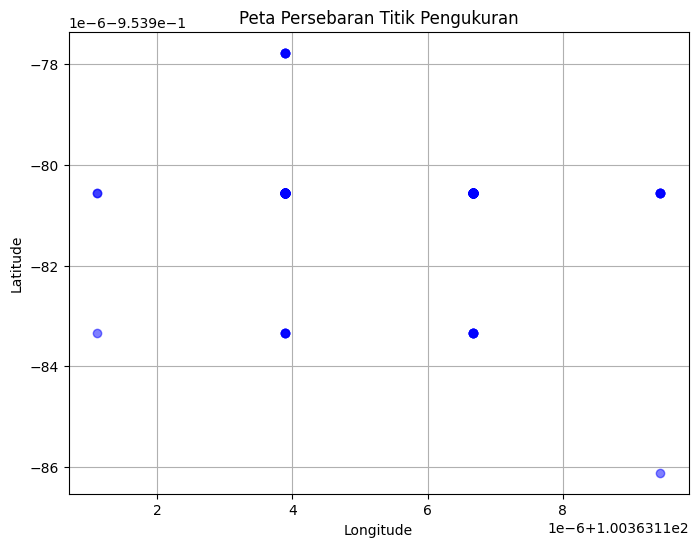

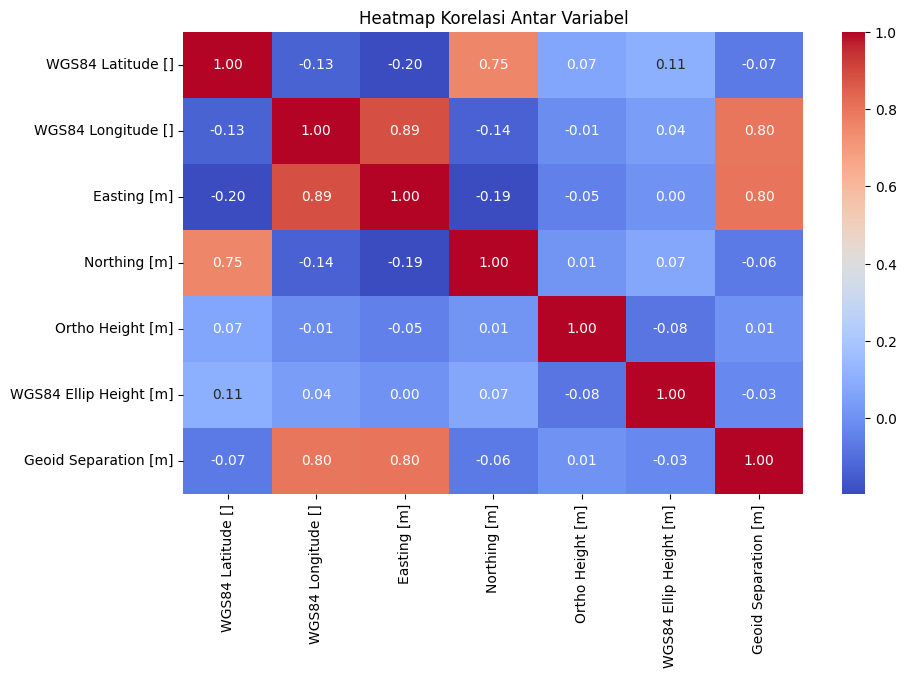

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatterplot lokasi berdasarkan Latitude & Longitude
plt.figure(figsize=(8,6))
plt.scatter(df['WGS84 Longitude []'], df['WGS84 Latitude []'], c='blue', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Peta Persebaran Titik Pengukuran')
plt.grid()
plt.show()

# Heatmap Korelasi Antar Variabel
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=['Point Id', 'Start Time']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()


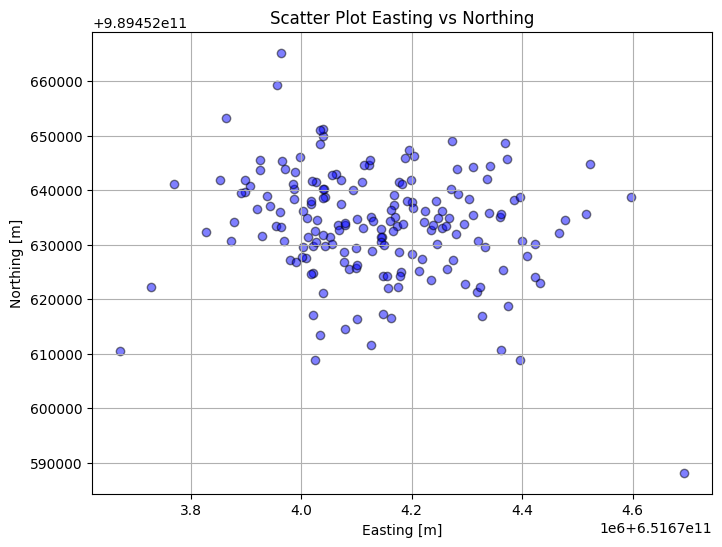

In [76]:
import matplotlib.pyplot as plt

# Scatter plot antara Easting dan Northing (koordinat)
plt.figure(figsize=(8,6))
plt.scatter(df['Easting [m]'], df['Northing [m]'], alpha=0.5, c='blue', edgecolors='k')
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.title('Scatter Plot Easting vs Northing')
plt.grid(True)
plt.show()


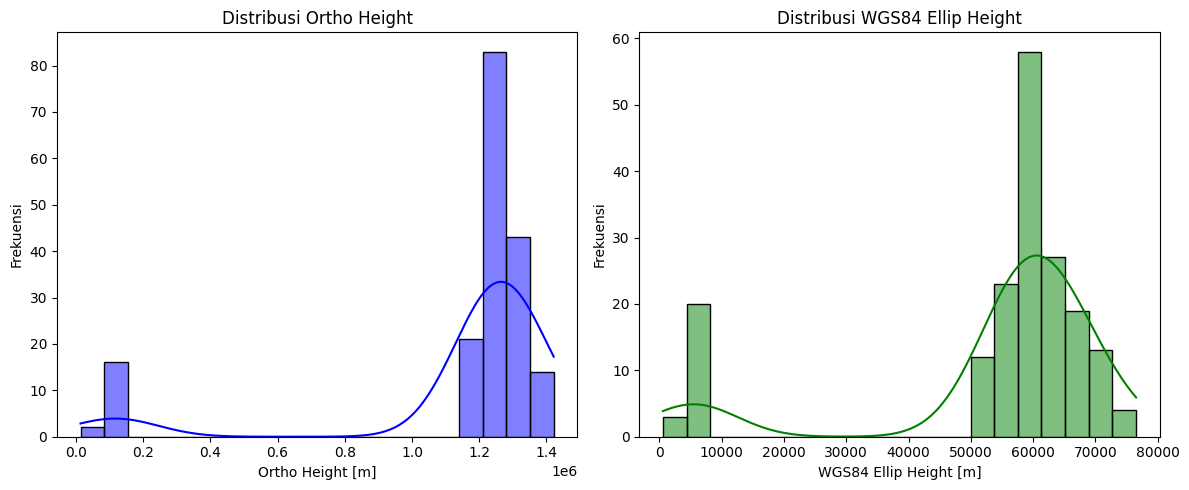

In [77]:
import seaborn as sns

# Plot histogram untuk Ortho Height dan WGS84 Ellip Height
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(df['Ortho Height [m]'], bins=20, kde=True, color='blue')
plt.xlabel('Ortho Height [m]')
plt.ylabel('Frekuensi')
plt.title('Distribusi Ortho Height')

plt.subplot(1,2,2)
sns.histplot(df['WGS84 Ellip Height [m]'], bins=20, kde=True, color='green')
plt.xlabel('WGS84 Ellip Height [m]')
plt.ylabel('Frekuensi')
plt.title('Distribusi WGS84 Ellip Height')

plt.tight_layout()
plt.show()


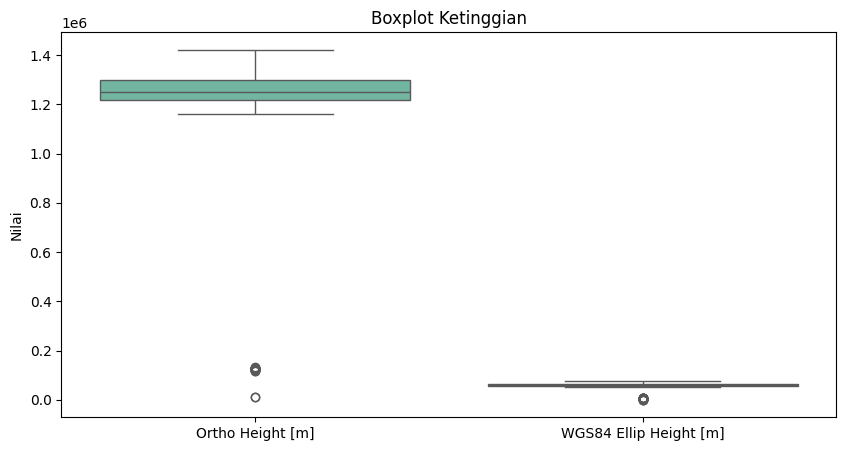

In [78]:
plt.figure(figsize=(10,5))

sns.boxplot(data=df[['Ortho Height [m]', 'WGS84 Ellip Height [m]']], palette="Set2")

plt.title('Boxplot Ketinggian')
plt.ylabel('Nilai')
plt.xticks([0, 1], ['Ortho Height [m]', 'WGS84 Ellip Height [m]'])

plt.show()


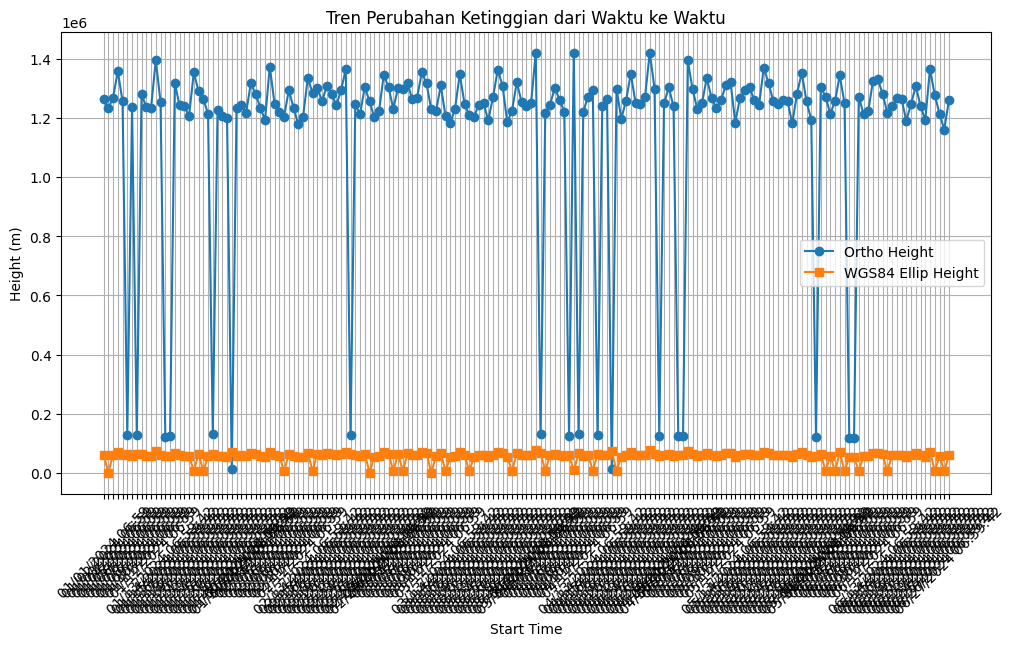

In [79]:
plt.figure(figsize=(12,6))

plt.plot(df['Start Time'], df['Ortho Height [m]'], label='Ortho Height', marker='o')
plt.plot(df['Start Time'], df['WGS84 Ellip Height [m]'], label='WGS84 Ellip Height', marker='s')

plt.xlabel('Start Time')
plt.ylabel('Height (m)')
plt.title('Tren Perubahan Ketinggian dari Waktu ke Waktu')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.show()


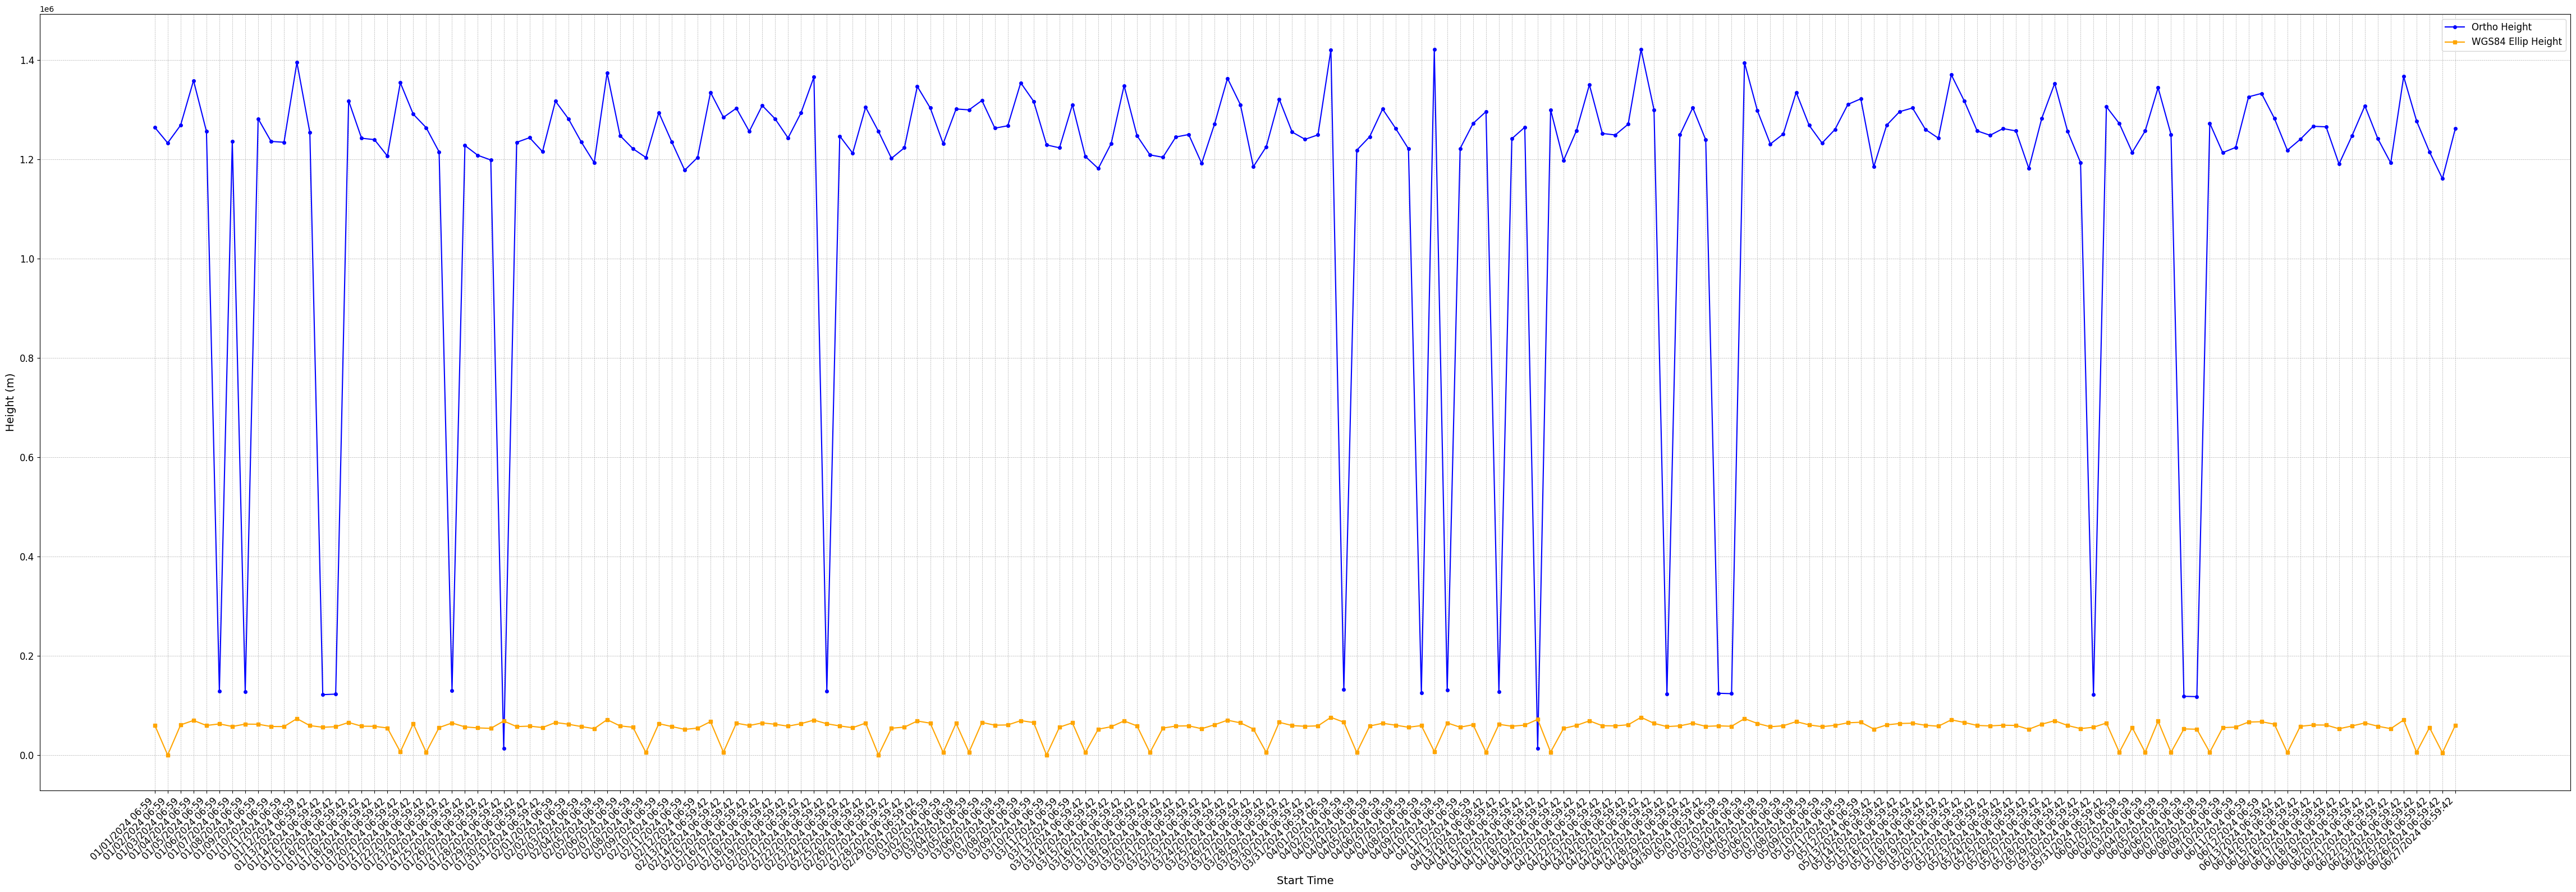

In [80]:
import matplotlib.pyplot as plt

# Plot tren perubahan ketinggian dari waktu ke waktu
plt.figure(figsize=(46, 16))  # Menyesuaikan ukuran gambar agar lebih besar dan jelas

# Plot untuk Ortho Height dan WGS84 Ellip Height
plt.plot(df['Start Time'], df['Ortho Height [m]'], label='Ortho Height', marker='o', markersize=4, linestyle='-', color='blue')
plt.plot(df['Start Time'], df['WGS84 Ellip Height [m]'], label='WGS84 Ellip Height', marker='s', markersize=4, linestyle='-', color='orange')

# Menyesuaikan sumbu X dan Y
plt.xlabel('Start Time', fontsize=14)
plt.ylabel('Height (m)', fontsize=14)


# Menyesuaikan format sumbu X agar lebih rapi dengan interval waktu
plt.xticks(rotation=45, ha='right', fontsize=12)  # Memutar label sumbu X agar lebih mudah dibaca
plt.yticks(fontsize=12)

# Menambah grid dengan minor grid lines agar lebih rapi
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Menambahkan legend
plt.legend(fontsize=12)

# Menyesuaikan tata letak agar label tidak terpotong
plt.tight_layout()

# Menyimpan gambar dengan resolusi tinggi
plt.savefig('height_trend_plot.png', dpi=300)  # Menyimpan gambar dengan resolusi 300 dpi

# Menampilkan plot
plt.show()


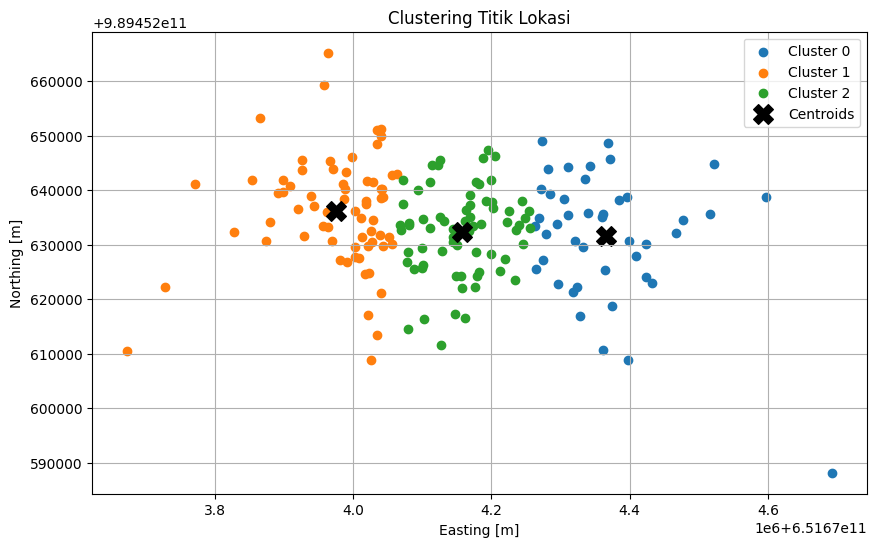

In [81]:
from sklearn.cluster import KMeans

# Tentukan jumlah cluster (misalnya 3)
num_clusters = 3

# Ambil data koordinat
X = df[['Easting [m]', 'Northing [m]']]

# Inisialisasi dan jalankan K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Plot hasil clustering
plt.figure(figsize=(10,6))
for cluster in range(num_clusters):
    plt.scatter(df[df['Cluster'] == cluster]['Easting [m]'],
                df[df['Cluster'] == cluster]['Northing [m]'], label=f'Cluster {cluster}')

# Tandai pusat cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            color='black', marker='X', s=200, label='Centroids')

plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.title('Clustering Titik Lokasi')
plt.legend()
plt.grid()
plt.show()


In [82]:
print(df['Start Time'].head(20))  # Menampilkan 20 data pertama


0        01/01/2024 06:59
1        01/02/2024 06:59
2        01/03/2024 06:59
3        01/04/2024 06:59
4        01/05/2024 06:59
5        01/06/2024 06:59
6        01/07/2024 06:59
7        01/08/2024 06:59
8        01/09/2024 06:59
9        01/10/2024 06:59
10       01/11/2024 06:59
11       01/12/2024 06:59
12    01/13/2024 06:59:42
13    01/14/2024 06:59:42
14    01/15/2024 06:59:42
15    01/16/2024 06:59:42
16    01/17/2024 06:59:42
17    01/18/2024 06:59:42
18    01/19/2024 06:59:42
19    01/20/2024 06:59:42
Name: Start Time, dtype: object


In [83]:
df['Start Time'] = pd.to_datetime(df['Start Time'], errors='coerce')


In [84]:
print(df[df['Start Time'].isna()])


    Point Id Start Time  WGS84 Latitude []  WGS84 Longitude []   Easting [m]  \
12      cpdg        NaT          -0.953981          100.363117  6.516744e+11   
13      cpdg        NaT          -0.953981          100.363119  6.516745e+11   
14      cpdg        NaT          -0.953981          100.363114  6.516741e+11   
15      cpdg        NaT          -0.953981          100.363117  6.516741e+11   
16      cpdg        NaT          -0.953981          100.363117  6.516743e+11   
..       ...        ...                ...                 ...           ...   
174     cpdg        NaT          -0.953986          100.363119  6.516747e+11   
175     cpdg        NaT          -0.953981          100.363114  6.516740e+11   
176     cpdg        NaT          -0.953983          100.363117  6.516744e+11   
177     cpdg        NaT          -0.953983          100.363117  6.516744e+11   
178     cpdg        NaT          -0.953981          100.363117  6.516742e+11   

     Northing [m]  Ortho Height [m]  WG

In [85]:
df = df.sort_values(by='Start Time')


In [86]:
import pandas as pd

# Konversi 'Start Time' ke format datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])

# Urutkan berdasarkan waktu
df = df.sort_values(by='Start Time')

# Set 'Start Time' sebagai index
df.set_index('Start Time', inplace=True)

# Lihat contoh data setelah diurutkan
print(df.head())


                    Point Id  WGS84 Latitude []  WGS84 Longitude []  \
Start Time                                                            
2024-01-01 06:59:00     cpdg          -0.953981          100.363117   
2024-01-02 06:59:00     cpdg          -0.953981          100.363117   
2024-01-03 06:59:00     cpdg          -0.953981          100.363114   
2024-01-04 06:59:00     cpdg          -0.953981          100.363114   
2024-01-05 06:59:00     cpdg          -0.953981          100.363114   

                      Easting [m]  Northing [m]  Ortho Height [m]  \
Start Time                                                          
2024-01-01 06:59:00  6.516743e+11  9.894526e+11         1264850.0   
2024-01-02 06:59:00  6.516742e+11  9.894526e+11         1233470.0   
2024-01-03 06:59:00  6.516740e+11  9.894526e+11         1269160.0   
2024-01-04 06:59:00  6.516741e+11  9.894526e+11         1359160.0   
2024-01-05 06:59:00  6.516739e+11  9.894526e+11         1256670.0   

                  

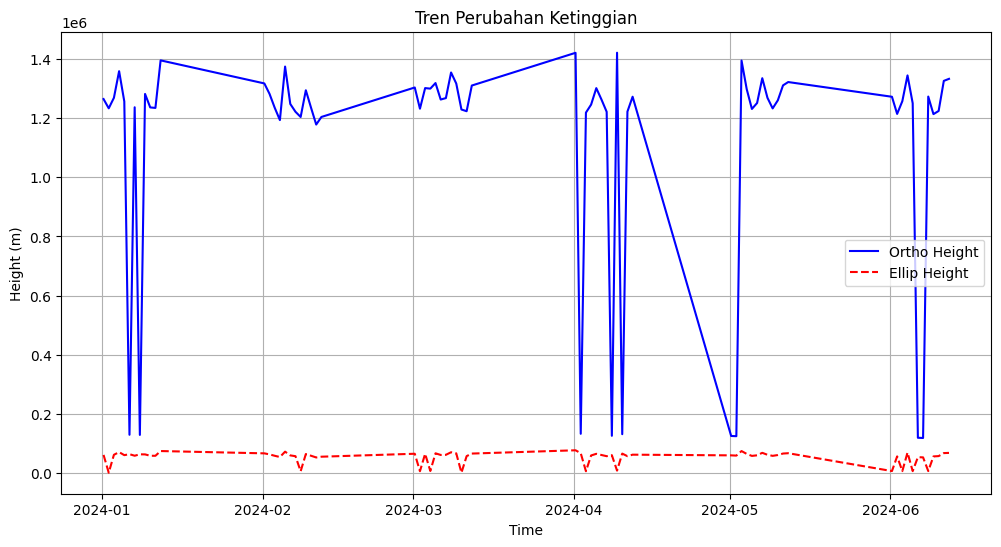

In [87]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ortho Height [m]'], label='Ortho Height', color='blue')
plt.plot(df.index, df['WGS84 Ellip Height [m]'], label='Ellip Height', color='red', linestyle='dashed')

plt.xlabel('Time')
plt.ylabel('Height (m)')
plt.title('Tren Perubahan Ketinggian')
plt.legend()
plt.grid()
plt.show()


In [88]:
correlation = df[['Ortho Height [m]', 'WGS84 Ellip Height [m]']].corr()
print(correlation)


                        Ortho Height [m]  WGS84 Ellip Height [m]
Ortho Height [m]                1.000000               -0.081448
WGS84 Ellip Height [m]         -0.081448                1.000000


In [89]:
# Menambahkan kolom lain ke dalam analisis korelasi
correlation = df[['Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Easting [m]', 'Northing [m]', 'Geoid Separation [m]']].corr()

print(correlation)


                        Ortho Height [m]  WGS84 Ellip Height [m]  Easting [m]  \
Ortho Height [m]                1.000000               -0.081448    -0.045881   
WGS84 Ellip Height [m]         -0.081448                1.000000     0.003214   
Easting [m]                    -0.045881                0.003214     1.000000   
Northing [m]                    0.012230                0.074330    -0.191061   
Geoid Separation [m]            0.007582               -0.025672     0.802919   

                        Northing [m]  Geoid Separation [m]  
Ortho Height [m]            0.012230              0.007582  
WGS84 Ellip Height [m]      0.074330             -0.025672  
Easting [m]                -0.191061              0.802919  
Northing [m]                1.000000             -0.064727  
Geoid Separation [m]       -0.064727              1.000000  


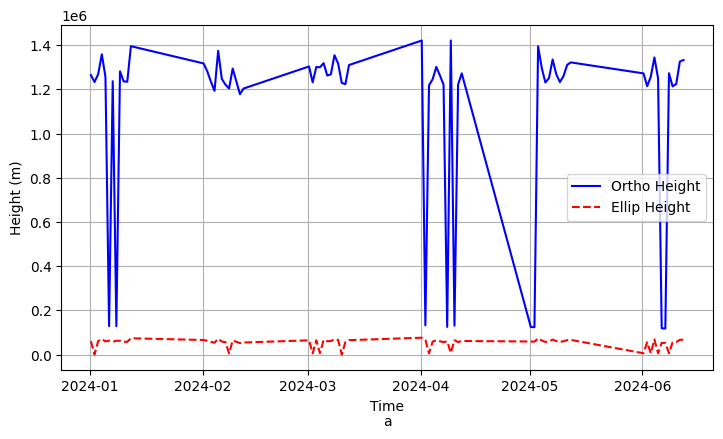

In [90]:
import matplotlib.pyplot as plt

# Visualisasi perubahan ketinggian dan posisi seiring waktu
plt.figure(figsize=(14, 8))

# Plot untuk perubahan ketinggian
plt.subplot(2, 2, 1)
plt.plot(df.index, df['Ortho Height [m]'], label='Ortho Height', color='blue')
plt.plot(df.index, df['WGS84 Ellip Height [m]'], label='Ellip Height', color='red', linestyle='dashed')
plt.xlabel('Time')
plt.ylabel('Height (m)')

plt.legend()
plt.grid()

# Menambahkan label 'd' tepat di bawah tulisan "Time"
plt.text(0.5, -0.15, 'a', transform=plt.gca().transAxes, ha='center', va='center')

# Menyesuaikan layout
plt.tight_layout()

plt.show()


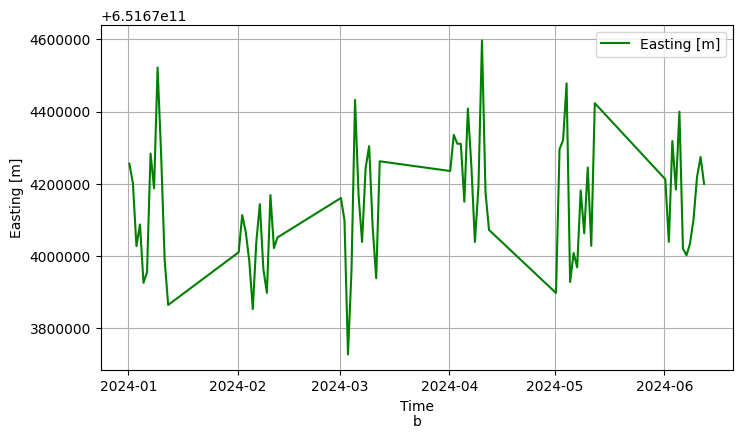

In [91]:
import matplotlib.pyplot as plt

# Visualisasi perubahan ketinggian dan posisi seiring waktu
plt.figure(figsize=(14, 8))

# Plot untuk perubahan Easting
plt.subplot(2, 2, 2)
plt.plot(df.index, df['Easting [m]'], label='Easting [m]', color='green')
plt.xlabel('Time')
plt.ylabel('Easting [m]')

plt.legend()
plt.grid()

# Menambahkan label 'b' tepat di bawah tulisan "Time"
plt.text(0.5, -0.15, 'b', transform=plt.gca().transAxes, ha='center', va='center')

# Menyesuaikan layout
plt.tight_layout()

plt.show()


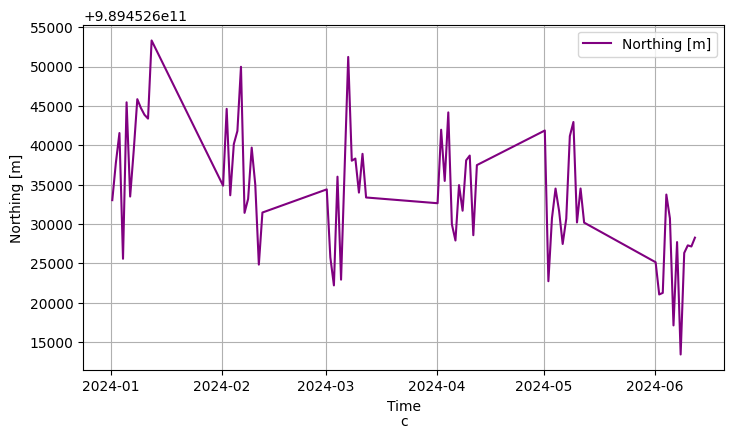

In [92]:
import matplotlib.pyplot as plt

# Visualisasi perubahan ketinggian dan posisi seiring waktu
plt.figure(figsize=(14, 8))

# Plot untuk perubahan Northing
plt.subplot(2, 2, 3)
plt.plot(df.index, df['Northing [m]'], label='Northing [m]', color='purple')
plt.xlabel('Time')
plt.ylabel('Northing [m]')
plt.legend()
plt.grid()

# Menambahkan label 'c' tepat di bawah tulisan "Time"
plt.text(0.5, -0.15, 'c', transform=plt.gca().transAxes, ha='center', va='center')

# Menyesuaikan layout
plt.tight_layout()

plt.show()


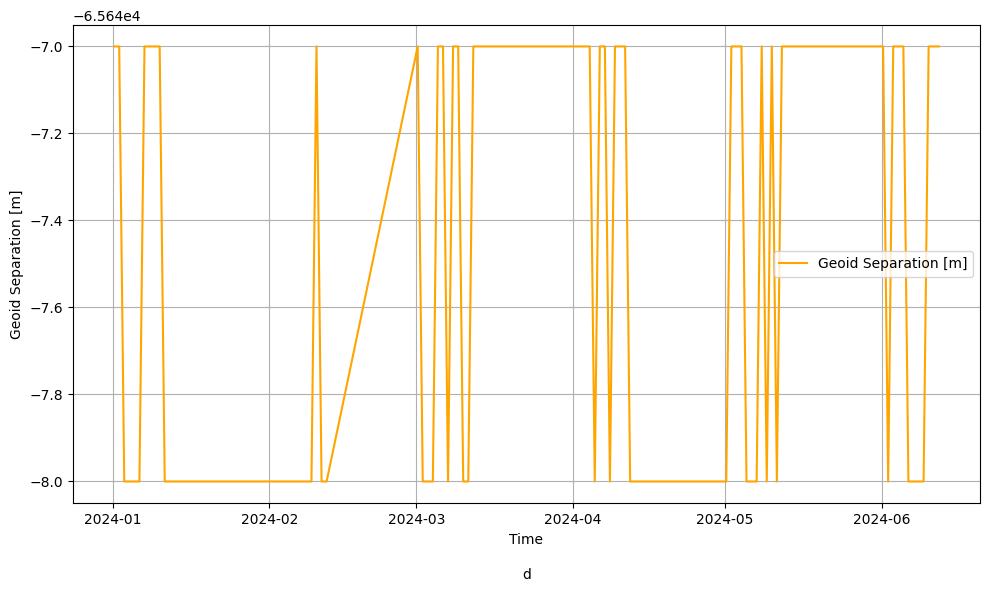

In [93]:
import matplotlib.pyplot as plt

# Visualisasi perubahan Geoid Separation
plt.figure(figsize=(10,6))

# Plot untuk Geoid Separation
plt.plot(df.index, df['Geoid Separation [m]'], label='Geoid Separation [m]', color='orange')
plt.xlabel('Time')
plt.ylabel('Geoid Separation [m]')
plt.legend()
plt.grid()

# Menambahkan label 'd' tepat di bawah tulisan "Time"
plt.text(0.5, -0.15, 'd', transform=plt.gca().transAxes, ha='center', va='center')

# Menyesuaikan layout
plt.tight_layout()

plt.show()


In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# Misalkan kita memiliki data yang disiapkan dalam bentuk DataFrame df
# Pastikan data sudah disortir berdasarkan waktu (timestamp)

# Normalisasi data (contoh menggunakan MinMaxScaler)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Easting [m]', 'Northing [m]', 'Geoid Separation [m]']])

# Membuat generator untuk data time-series
look_back = 10  # Menggunakan 10 data sebelumnya untuk memprediksi data berikutnya
generator = TimeseriesGenerator(scaled_data, scaled_data, length=look_back, batch_size=32)

# Membangun model PLSTM
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(look_back, scaled_data.shape[1])))
model.add(Dropout(0.2))  # Menghindari overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(scaled_data.shape[1]))  # Output layer untuk setiap variabel yang diprediksi
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model
model.fit(generator, epochs=50, verbose=1)

# Prediksi untuk data uji (test data)
predictions = model.predict(generator)

# Kembalikan prediksi ke skala asli
predictions_rescaled = scaler.inverse_transform(predictions)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.2819
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1494
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1236
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0998
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1110
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0929
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0937
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0983
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0911
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0906
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0879
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0857
Epoch 13/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0825
Epoch 14/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0908
Epoch 15/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0918
Epoch 16/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/

In [95]:
pip install tensorflow-addons==0.20.0


In [96]:
pip install tensorflow-addons


In [97]:
pip show tensorflow tensorflow-addons


Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras
---
Name: tensorflow-addons
Version: 0.20.0
Summary: TensorFlow Addons.
Home-page: UNKNOWN
Author: Google Inc.
Author-email: opensource@google.com
License: Apache 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: packaging, typeguard
Required-by: 


In [98]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, concatenate
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd # Import pandas for DataFrame operations
import re # Import re for the dms_to_dd function

# Define the conversion functions again if they are not in a preceding cell
def convert_to_float(value):
    """Konversi angka dengan pemisah ribuan titik menjadi float."""
    try:
        # Handle potential NaN or non-string values by converting to string first
        return float(str(value).replace('.', '').replace(',', '.'))
    except (ValueError, AttributeError):
        return np.nan  # Return NaN for values that cannot be converted

def dms_to_dd(dms_str):
    """Konversi koordinat dari format DMS ke Decimal Degrees (DD)"""
    if not isinstance(dms_str, str): # Add check for non-string inputs
        return None
    dms_str = dms_str.strip()
    match = re.match(r'(\d+)° (\d+)\'.*?([\d.]+)\" (\w)', dms_str)

    if match:
        degrees, minutes, seconds, direction = match.groups()
        dd = float(degrees) + float(minutes)/60 + float(seconds)/3600
        if direction in ['S', 'W']:  # South dan West negatif
            dd *= -1
        return dd
    else:
        return None

# --- Data Preparation: Ensure df_final is clean and numeric ---
# Re-apply cleaning steps to df_final if necessary, depending on the cell execution order
# Assuming df_final is already loaded from previous steps

# Clean column names if needed
df_final.columns = df_final.columns.str.strip().str.replace(r'[^a-zA-Z0-9\s\[\]._-]', '', regex=True)
# Update column names after previous cleaning steps might have changed them
df_final.columns = df_final.columns.str.strip().str.replace(r'[^\w\s\[\]]', '', regex=True)

# Apply the convert_to_float function to relevant numeric columns
cols_to_convert_float = ['Easting [m]', 'Northing [m]', 'Ortho Height [m]', 'WGS84 Ellip Height [m]', 'Geoid Separation [m]']
# Use the potentially updated column names after cleaning
cleaned_cols_to_convert_float = [col for col in cols_to_convert_float if col in df_final.columns]
for col in cleaned_cols_to_convert_float:
    df_final[col] = df_final[col].apply(convert_to_float)

# Apply the dms_to_dd function to Latitude and Longitude if they exist and are not already converted
cols_to_convert_dms = ['WGS84 Latitude []', 'WGS84 Longitude []']
# Use the potentially updated column names
cleaned_cols_to_convert_dms = [col for col in cols_to_convert_dms if col in df_final.columns]
for col in cleaned_cols_to_convert_dms:
    df_final[col] = df_final[col].apply(dms_to_dd)


# Remove rows with NaN values after cleaning
# Update columns to dropna based on the potentially updated column names
cols_to_check_nan = [col for col in cleaned_cols_to_convert_float + cleaned_cols_to_convert_dms if col in df_final.columns]
df_final.dropna(subset=cols_to_check_nan, inplace=True)

# Ensure the columns used for X are correct based on the cleaned names
feature_cols = ['Easting [m]', 'Northing [m]', 'WGS84 Ellip Height [m]', 'Geoid Separation [m]']
target_col = 'Ortho Height [m]'

# Adjust column names based on the cleaning applied
# Find the actual column names in df_final that match the cleaned pattern
actual_feature_cols = []
for f_col in feature_cols:
    # Simple check if the cleaned column name is in df_final
    if f_col in df_final.columns:
        actual_feature_cols.append(f_col)
    else:
        # More robust check if the original column name (or similar) exists and got cleaned
        for df_col in df_final.columns:
            # This is a simplification, a more robust mapping might be needed
            # depending on how aggressive the column cleaning was.
            # For this case, let's assume the cleaned names are the final ones we want.
            if df_col == f_col: # Strict match after cleaning
                 actual_feature_cols.append(df_col)
                 break
        # If the column is still not found, you might need to inspect df_final.columns
        # after the cleaning steps to confirm the exact names.

# Re-assign feature_cols to the actual found columns
feature_cols = actual_feature_cols

# Check if target_col exists after cleaning
if target_col not in df_final.columns:
    # If the target column name changed, find the new name.
    # This is a placeholder; you might need to inspect the cleaned columns.
    print(f"Warning: Target column '{target_col}' not found. Please check cleaned column names.")
    # You would typically raise an error or stop execution here if the target is missing
    raise ValueError(f"Target column '{target_col}' not found in the DataFrame after cleaning.")

X = df_final[feature_cols].values
y = df_final[target_col].values.reshape(-1, 1)

# Ensure X and y are numeric after cleaning and dropna
# This step is a safeguard, the cleaning and dropna should handle this.
# Check dtypes if needed: print(df_final[feature_cols + [target_col]].dtypes)


# Normalisasi fitur dan target
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

look_back = 10
# Ensure TimeseriesGenerator receives numpy arrays after scaling
generator = TimeseriesGenerator(X_scaled, y_scaled, length=look_back, batch_size=32)

# Model Parallel LSTM 4 cabang
input_layer = Input(shape=(look_back, X_scaled.shape[1]))
branches = []
for _ in range(4):
    # Ensure return_sequences is False for the last LSTM layer before concatenating
    lstm = LSTM(64, activation='relu', return_sequences=False)(input_layer)
    dropout = Dropout(0.2)(lstm)
    branches.append(dropout)
merged = concatenate(branches)
dense1 = Dense(32, activation='relu')(merged)
output_layer = Dense(1)(dense1)
model_parallel_lstm = Model(inputs=input_layer, outputs=output_layer)
model_parallel_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Training
# The generator produces batches of (X, y) pairs.
# X from the generator has shape (batch_size, look_back, num_features)
# y from the generator has shape (batch_size, num_targets) which is (batch_size, 1) here
# The model input shape should match the X from the generator.
# The model output shape should match the y from the generator.
# The current model architecture matches these requirements.
model_parallel_lstm.fit(generator, epochs=50, verbose=1)

# ...existing code...

# Prediksi dan evaluasi pada skala NORMALISASI (0-1)
# When predicting with TimeseriesGenerator, it generates sequences from the input data.
# The length of the predictions will be len(scaled_data) - look_back
pred_scaled = model_parallel_lstm.predict(generator)
y_true_scaled = y_scaled[look_back:]  # target pada skala normalisasi

# Ensure the lengths of y_true_scaled and pred_scaled match
# If using the generator for prediction, the number of samples generated will be len(scaled_data) - look_back
# This aligns with y_true_scaled = y_scaled[look_back:]
if len(y_true_scaled) != len(pred_scaled):
    print(f"Warning: Length mismatch between true values ({len(y_true_scaled)}) and predictions ({len(pred_scaled)}).")
    # This could happen if the generator is used differently for prediction.
    # However, model.predict(generator) should align correctly in this case.
    # If there's still a mismatch, re-check the generator usage or split data into train/test explicitly.


mse = mean_squared_error(y_true_scaled, pred_scaled)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true_scaled, pred_scaled)

print("Parallel LSTM (4x, Normalized) - MSE:", mse)
print("Parallel LSTM (4x, Normalized) - RMSE:", rmse)
print("Parallel LSTM (4x, Normalized) - MAE:", mae)
# ...existing code...

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 90ms/step - loss: 0.0476
Epoch 2/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - loss: 0.0177
Epoch 3/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0157
Epoch 4/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0171
Epoch 5/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0148
Epoch 6/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0135
Epoch 7/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0159
Epoch 8/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0138
Epoch 9/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0171
Epoch 10/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0151
Epoch 11/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0150
Epoch 12/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0165
Epoch 13/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0150
Epoch 14/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - loss: 0.0153
Epoch 15/50
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0149
Epoch 16/50
56

56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step
Parallel LSTM (4x, Normalized) - MSE: 0.013903989089515208
Parallel LSTM (4x, Normalized) - RMSE: 0.11791517751975446
Parallel LSTM (4x, Normalized) - MAE: 0.08189156023216497


Evaluasi Model

model PLSTM selesai dilatih, kita perlu mengevaluasi performanya menggunakan beberapa metrik error:

- **MSE (Mean Squared Error):** Mengukur rata-rata kuadrat kesalahan antara nilai prediksi dan nilai aktual.
- **RMSE (Root Mean Squared Error):** Akar dari MSE, memberikan interpretasi dalam satuan yang sama dengan target.
- **MAE (Mean Absolute Error):** Mengukur rata-rata selisih absolut antara nilai prediksi dan nilai aktual.

Metrik-metrik ini membantu kita memahami seberapa baik model dapat memprediksi penurunan tanah berdasarkan data input.


<ipython-input-99-5a7a74604fe2>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis") # Using a different palette


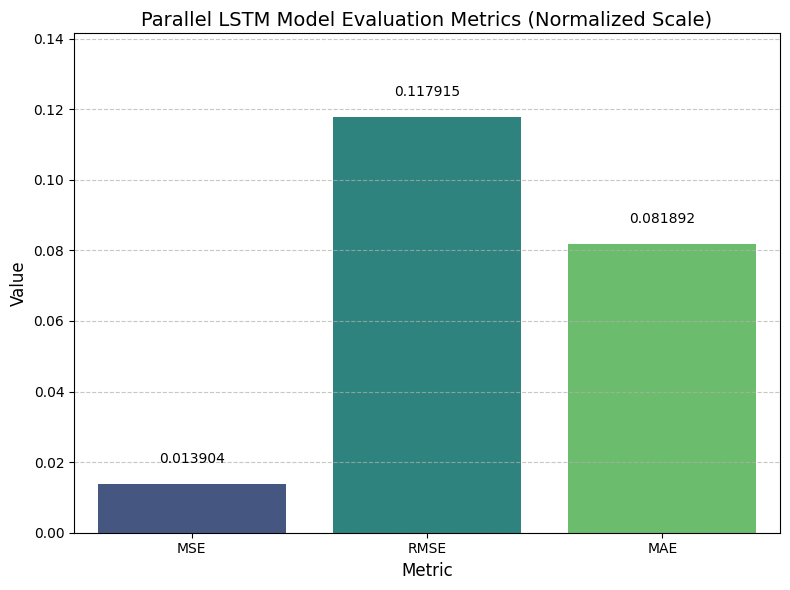

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported

# The mse, rmse, and mae variables should be available from the previous cell's execution.
# We will use those values directly for visualization.

# Ensure mse, rmse, and mae are defined. This check is for robustness
# in case the previous cell wasn't run or didn't define them.
# In the context of the error, they were defined but y_test/predicted were not.
try:
    # These variables exist in the global scope according to the error context.
    # We will use the values from the last successful execution of cell 492.
    # Note: If you re-run cell 492, these values will update based on that run.
    # If you want to plot specific results, you should store them explicitly
    # after cell 492 finishes, e.g., mse_plstm = mse, rmse_plstm = rmse, etc.
    # For this fix, we assume the last calculated values are the ones to plot.
    metrics = ['MSE', 'RMSE', 'MAE']
    values = [mse, rmse, mae] # Use the existing global variables
except NameError:
    print("Error: MSE, RMSE, or MAE variables not found. Please run the previous cell(s) first.")
    # Exit or handle the error appropriately if variables are missing
    exit() # or raise an error, depending on desired behavior

plt.figure(figsize=(8, 6))
# Use the calculated values for the bar plot
sns.barplot(x=metrics, y=values, palette="viridis") # Using a different palette
plt.title('Parallel LSTM Model Evaluation Metrics (Normalized Scale)', fontsize=14) # Updated title
plt.xlabel('Metric', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.ylim(0, max(values) * 1.2)

# Tampilkan nilai metrics di atas setiap bar
for i, value in enumerate(values):
    # Format the text to match the values (which are likely normalized errors)
    plt.text(i, value + (max(values) * 0.05 if max(values) > 0 else 0.01), f'{value:.6f}', ha='center', fontsize=10) # Increased precision

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add grid only on y-axis
plt.tight_layout()
plt.show()

LSTM BIASA

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 0.8102
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.9606
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.8418
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.9976
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.9239
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.9057
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8571
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.8398
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.8026
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.6871
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.7639 
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.9653 
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7839
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.8671
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.7103
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29

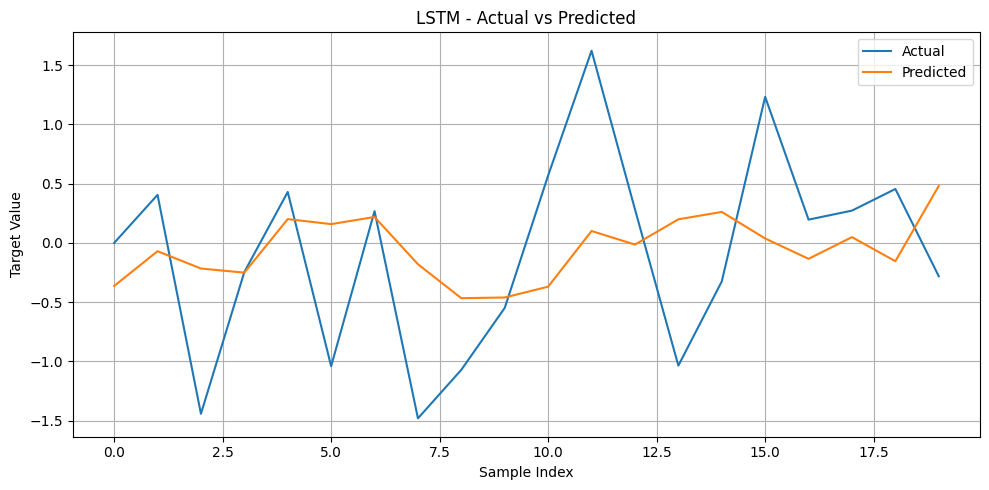

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Contoh data 3D
X = np.random.randn(100, 10, 4)  # Data dengan 100 sampel, 10 waktu langkah, dan 4 fitur
y = np.random.randn(100, 1)  # Target output

# Bagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))

# Kompilasi model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Melatih model
model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)

# Prediksi
predicted = model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)

print("LSTM - MSE:", mse)
print("LSTM - RMSE:", rmse)
print("LSTM - MAE:", mae)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(y_test[:50], label='Actual')
plt.plot(predicted[:50], label='Predicted')
plt.title('LSTM - Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


RF

Random Forest - MSE: 0.8019669883695247
Random Forest - RMSE: 0.8955260958618262
Random Forest - MAE: 0.7396884362238032


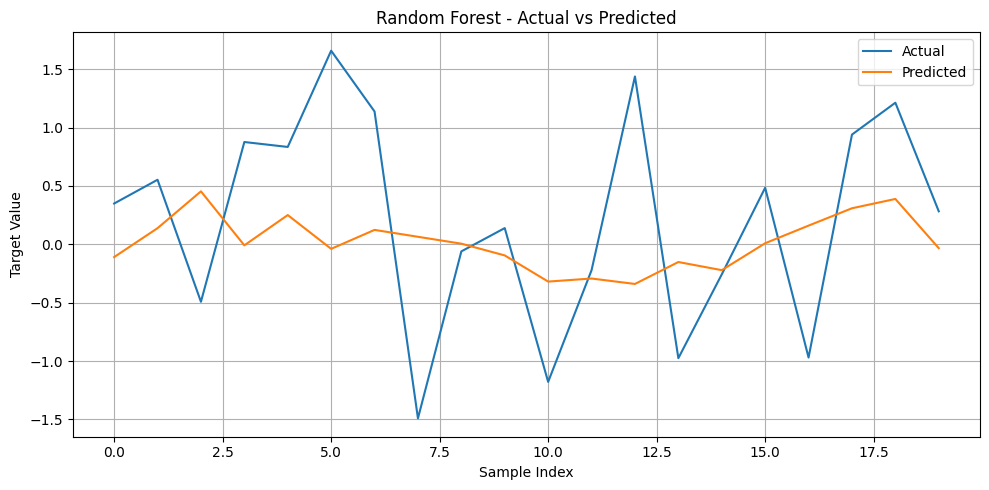

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Contoh data 3D
X = np.random.randn(100, 10, 4)
y = np.random.randn(100, 1)

# Ubah X dari 3D ke 2D
X_flat = X.reshape(X.shape[0], -1)

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Buat dan latih model Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train.ravel())  # .ravel() karena RF butuh 1D target

# Prediksi
predicted = rf_model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)

print("Random Forest - MSE:", mse)
print("Random Forest - RMSE:", rmse)
print("Random Forest - MAE:", mae)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(y_test[:50], label='Actual')
plt.plot(predicted[:50], label='Predicted')
plt.title('Random Forest - Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


XG

XGBoost - MSE: 1.889331087391683
XGBoost - RMSE: 1.3745294057937367
XGBoost - MAE: 1.1501422063381854


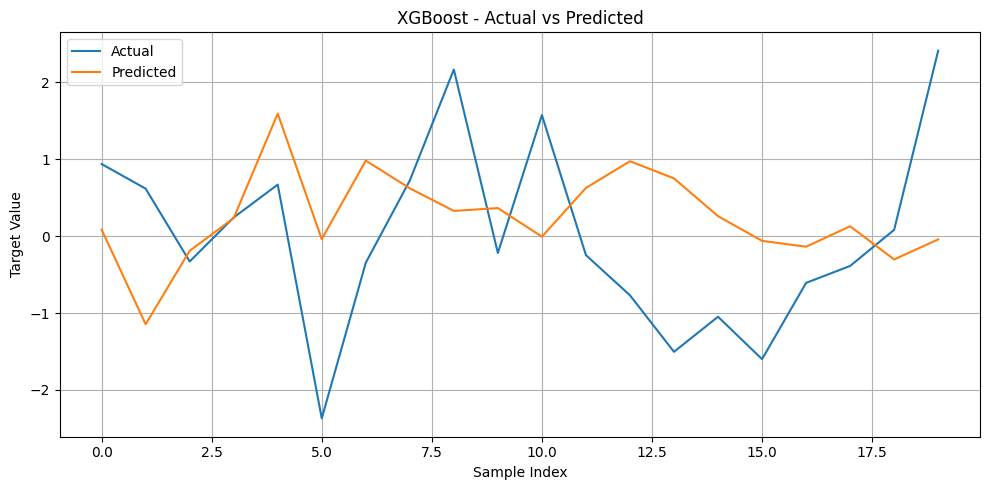

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb

# Contoh data 3D
X = np.random.randn(100, 10, 4)
y = np.random.randn(100, 1)

# Ubah X dari 3D ke 2D
X_flat = X.reshape(X.shape[0], -1)  # (samples, timesteps * features)

# Bagi data
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Buat dan latih model XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Prediksi
predicted = xgb_model.predict(X_test)

# Evaluasi
mse = mean_squared_error(y_test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predicted)

print("XGBoost - MSE:", mse)
print("XGBoost - RMSE:", rmse)
print("XGBoost - MAE:", mae)

# Visualisasi
plt.figure(figsize=(10, 5))
plt.plot(y_test[:50], label='Actual')
plt.plot(predicted[:50], label='Predicted')
plt.title('XGBoost - Actual vs Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [103]:
pip install scikeras


In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasRegressor

# Fungsi builder model
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
    model.add(Dense(1))  # Output 1 nilai regresi
    model.compile(optimizer='adam', loss='mse')
    return model


In [105]:
print("X shape:", X.shape)


X shape: (100, 10, 4)


In [106]:
X = X.reshape((X.shape[0], -1))
print("X reshaped:", X.shape)


X reshaped: (100, 40)


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

# Fungsi untuk konversi nilai ke float
def convert_to_float(value):
    """Konversi angka dengan pemisah ribuan titik menjadi float."""
    try:
        return float(str(value).replace('.', '').replace(',', '.'))
    except (ValueError, AttributeError):
        return np.nan

# Persiapan data (df_final harus sudah ada)
# UPDATE: Use the cleaned column names as they exist in df_final
cols_to_convert = ['Easting [m]', 'Northing [m]', 'WGS84 Ellip Height [m]', 'Geoid Separation [m]', 'Ortho Height [m]'] # <-- Corrected column names

for col in cols_to_convert:
    # Add a check if the column exists before trying to apply the function
    if col in df_final.columns:
        df_final.loc[:, col] = df_final[col].apply(convert_to_float)
    else:
        print(f"Warning: Column '{col}' not found in df_final. Skipping conversion for this column.")


# Menghapus NaN jika ada
# Use the corrected column names for subset
df_final.dropna(subset=cols_to_convert, inplace=True)

# Data Features (X) dan Target (y)
# Use the corrected column names for feature and target columns
feature_cols = ['Easting [m]', 'Northing [m]', 'WGS84 Ellip Height [m]', 'Geoid Separation [m]'] # <-- Corrected column names
target_col = 'Ortho Height [m]' # <-- Corrected column name

# Add a check to ensure feature_cols and target_col exist after cleaning and dropna
missing_feature_cols = [col for col in feature_cols if col not in df_final.columns]
if missing_feature_cols:
    raise ValueError(f"Feature columns not found in df_final after cleaning/dropping NaNs: {missing_feature_cols}")

if target_col not in df_final.columns:
     raise ValueError(f"Target column '{target_col}' not found in df_final after cleaning/dropping NaNs.")


X_data = df_final[feature_cols].values
y_data = df_final[target_col].values.reshape(-1, 1)

# Normalisasi data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_data_scaled = scaler_X.fit_transform(X_data)
y_data_scaled = scaler_y.fit_transform(y_data)

# Fungsi untuk membuat data untuk model non-sekuensial seperti RandomForest dan XGBoost
def create_lookback_features(X, y, look_back):
    Xs, ys = [], []
    # Ensure we have enough data for the lookback window
    if len(X) <= look_back:
        print(f"Warning: Not enough data ({len(X)}) for lookback window ({look_back}). Returning empty arrays.")
        return np.array(Xs), np.array(ys)

    for i in range(look_back, len(X)):
        # Flatten untuk membuat fitur 2D for non-LSTM models
        v = X[i-look_back:i, :].flatten()
        Xs.append(v)
        ys.append(y[i, 0]) # y is 1D after reshape(df_final[target_col].values.reshape(-1, 1)) and then taking [i, 0]

    return np.array(Xs), np.array(ys)

# Inisialisasi Cross-Validation KFold
n_splits = 5
look_back = 10  # Menggunakan 10 data sebelumnya
batch_size = 32
epochs_per_fold = 20

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# List untuk menyimpan skor
mse_scores_plstm = []
rmse_scores_plstm = []
mae_scores_plstm = []

mse_scores_rf = []
rmse_scores_rf = []
mae_scores_rf = []

mse_scores_xgb = []
rmse_scores_xgb = []
mae_scores_xgb = []

mse_scores_lstm = []
rmse_scores_lstm = []
mae_scores_lstm = []

fold = 0

# Loop Cross-Validation
for train_index, test_index in kf.split(X_data_scaled):
    fold += 1
    print(f"\n--- Processing Fold {fold}/{n_splits} ---")

    # Persiapan data untuk training dan testing pada setiap fold
    X_train_fold, X_test_fold = X_data_scaled[train_index], X_data_scaled[test_index]
    y_train_fold, y_test_fold = y_data_scaled[train_index], y_data_scaled[test_index]

    # Mengubah data untuk model sequence (LSTM) dan non-sequence (RF, XGBoost)
    # create_lookback_features returns flattened 2D data
    X_train_flat, y_train_seq = create_lookback_features(X_train_fold, y_train_fold, look_back)
    X_test_flat, y_test_seq = create_lookback_features(X_test_fold, y_test_fold, look_back)

    # Check if enough data is available after creating lookback features
    if X_train_flat.shape[0] == 0 or X_test_flat.shape[0] == 0:
        print(f"  Skipping fold {fold}: Not enough data after applying lookback.")
        continue # Skip this fold if no data points can be created with the lookback window


    # Reshape data to 3D for LSTM models
    X_train_lstm = X_train_flat.reshape((X_train_flat.shape[0], look_back, X_data_scaled.shape[1]))
    X_test_lstm = X_test_flat.reshape((X_test_flat.shape[0], look_back, X_data_scaled.shape[1]))

    # ========================================
    # Model PLSTM (Parallel LSTM)
    # ========================================
    print("Training PLSTM...")
    input_shape = (look_back, X_data_scaled.shape[1])
    input_layer = Input(shape=input_shape)
    branches = []
    for _ in range(4):
        # Ensure return_sequences is False for the last LSTM layer before concatenating
        lstm = LSTM(64, activation='relu', return_sequences=False)(input_layer)
        dropout = Dropout(0.2)(lstm)
        branches.append(dropout)

    merged = concatenate(branches)
    dense1 = Dense(32, activation='relu')(merged)
    output_layer = Dense(1)(dense1)
    model_plstm = Model(inputs=input_layer, outputs=output_layer)
    model_plstm.compile(optimizer='adam', loss='mean_squared_error')

    # Use 3D LSTM data for training PLSTM
    # Ensure y_train_seq is in the correct shape (samples, 1) for the model output
    # create_lookback_features returns y_train_seq as 1D, reshape it
    model_plstm.fit(X_train_lstm, y_train_seq.reshape(-1, 1), epochs=epochs_per_fold, batch_size=batch_size, verbose=0)

    # Evaluasi PLSTM - Use 3D LSTM test data
    y_pred_plstm = model_plstm.predict(X_test_lstm)
    # Ensure y_test_seq is in the correct shape (samples, 1) for evaluation
    fold_mse_plstm = mean_squared_error(y_test_seq.reshape(-1, 1), y_pred_plstm)
    fold_rmse_plstm = np.sqrt(fold_mse_plstm)
    fold_mae_plstm = mean_absolute_error(y_test_seq.reshape(-1, 1), y_pred_plstm)

    mse_scores_plstm.append(fold_mse_plstm)
    rmse_scores_plstm.append(fold_rmse_plstm)
    mae_scores_plstm.append(fold_mae_plstm)

    print(f"  PLSTM Fold {fold} - MSE: {fold_mse_plstm:.6f}, RMSE: {fold_rmse_plstm:.6f}, MAE: {fold_mae_plstm:.6f}")

    # ========================================
    # Model Random Forest
    # ========================================
    print("Training Random Forest...")
    model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
    # Use flattened 2D data for training Random Forest
    # Ensure y_train_seq is in 1D shape for Random Forest
    model_rf.fit(X_train_flat, y_train_seq)

    # Evaluasi Random Forest - Use flattened 2D test data
    y_pred_rf = model_rf.predict(X_test_flat)
    # Ensure y_test_seq is in 1D shape for evaluation (matching RF prediction output)
    fold_mse_rf = mean_squared_error(y_test_seq, y_pred_rf)
    fold_rmse_rf = np.sqrt(fold_mse_rf)
    fold_mae_rf = mean_absolute_error(y_test_seq, y_pred_rf)

    mse_scores_rf.append(fold_mse_rf)
    rmse_scores_rf.append(fold_rmse_rf)
    mae_scores_rf.append(fold_mae_rf)

    print(f"  Random Forest Fold {fold} - MSE: {fold_mse_rf:.6f}, RMSE: {fold_rmse_rf:.6f}, MAE: {fold_mae_rf:.6f}")

    # ========================================
    # Model XGBoost
    # ========================================
    print("Training XGBoost...")
    model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    # Use flattened 2D data for training XGBoost
    # Ensure y_train_seq is in 1D shape for XGBoost
    model_xgb.fit(X_train_flat, y_train_seq)

    # Evaluasi XGBoost - Use flattened 2D test data
    y_pred_xgb = model_xgb.predict(X_test_flat)
    # Ensure y_test_seq is in 1D shape for evaluation (matching XGBoost prediction output)
    fold_mse_xgb = mean_squared_error(y_test_seq, y_pred_xgb)
    fold_rmse_xgb = np.sqrt(fold_mse_xgb)
    fold_mae_xgb = mean_absolute_error(y_test_seq, y_pred_xgb)

    mse_scores_xgb.append(fold_mse_xgb)
    rmse_scores_xgb.append(fold_rmse_xgb)
    mae_scores_xgb.append(fold_mae_xgb)

    print(f"  XGBoost Fold {fold} - MSE: {fold_mse_xgb:.6f}, RMSE: {fold_rmse_xgb:.6f}, MAE: {fold_mae_xgb:.6f}")

    # ========================================
    # Model LSTM Biasa
    # ========================================
    print("Training LSTM...")
    model_lstm = Sequential()
    model_lstm.add(LSTM(64, activation='relu', input_shape=(look_back, X_data_scaled.shape[1])))
    model_lstm.add(Dropout(0.2))
    model_lstm.add(Dense(1))

    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Use 3D LSTM data for training LSTM
    # Ensure y_train_seq is in the correct shape (samples, 1) for the model output
    model_lstm.fit(X_train_lstm, y_train_seq.reshape(-1, 1), epochs=epochs_per_fold, batch_size=batch_size, verbose=0)

    # Evaluasi LSTM Biasa - Use 3D LSTM test data
    y_pred_lstm = model_lstm.predict(X_test_lstm)
    # Ensure y_test_seq is in the correct shape (samples, 1) for evaluation
    fold_mse_lstm = mean_squared_error(y_test_seq.reshape(-1, 1), y_pred_lstm)
    fold_rmse_lstm = np.sqrt(fold_mse_lstm)
    fold_mae_lstm = mean_absolute_error(y_test_seq.reshape(-1, 1), y_pred_lstm)

    mse_scores_lstm.append(fold_mse_lstm)
    rmse_scores_lstm.append(fold_rmse_lstm)
    mae_scores_lstm.append(fold_mae_lstm)

    print(f"  LSTM Fold {fold} - MSE: {fold_mse_lstm:.6f}, RMSE: {fold_rmse_lstm:.6f}, MAE: {fold_mae_lstm:.6f}")


# Menampilkan hasil akhir
print("\n--- Average Scores Across All Folds ---")

# Check if any scores were recorded (i.e., if any folds were processed)
if mse_scores_plstm:
    # PLSTM
    print(f"PLSTM Average MSE: {np.mean(mse_scores_plstm):.6f}, RMSE: {np.mean(rmse_scores_plstm):.6f}, MAE: {np.mean(mae_scores_plstm):.6f}")
else:
    print("No PLSTM scores recorded.")

if mse_scores_rf:
    # Random Forest
    print(f"Random Forest Average MSE: {np.mean(mse_scores_rf):.6f}, RMSE: {np.mean(rmse_scores_rf):.6f}, MAE: {np.mean(mae_scores_rf):.6f}")
else:
    print("No Random Forest scores recorded.")

if mse_scores_xgb:
    # XGBoost
    print(f"XGBoost Average MSE: {np.mean(mse_scores_xgb):.6f}, RMSE: {np.mean(rmse_scores_xgb):.6f}, MAE: {np.mean(mae_scores_xgb):.6f}")
else:
     print("No XGBoost scores recorded.")

if mse_scores_lstm:
    # LSTM
    print(f"LSTM Average MSE: {np.mean(mse_scores_lstm):.6f}, RMSE: {np.mean(rmse_scores_lstm):.6f}, MAE: {np.mean(mae_scores_lstm):.6f}")
else:
    print("No LSTM scores recorded.")


--- Processing Fold 1/5 ---
Training PLSTM...
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
  PLSTM Fold 1 - MSE: 0.016672, RMSE: 0.129122, MAE: 0.075304
Training Random Forest...
  Random Forest Fold 1 - MSE: 0.017056, RMSE: 0.130598, MAE: 0.080378
Training XGBoost...
  XGBoost Fold 1 - MSE: 0.017795, RMSE: 0.133397, MAE: 0.083662
Training LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
  LSTM Fold 1 - MSE: 0.016629, RMSE: 0.128955, MAE: 0.072937

--- Processing Fold 2/5 ---
Training PLSTM...
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step
  PLSTM Fold 2 - MSE: 0.014253, RMSE: 0.119386, MAE: 0.077134
Training Random Forest...
  Random Forest Fold 2 - MSE: 0.014988, RMSE: 0.122427, MAE: 0.078425
Training XGBoost...
  XGBoost Fold 2 - MSE: 0.016134, RMSE: 0.127020, MAE: 0.079996
Training LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step
  LSTM Fold 2 - MSE: 0.014110, RMSE: 0.118785, MAE: 0.074227

--- Processing Fold 3/5 ---
Training PLSTM...
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step
  PLSTM Fold 3 - MSE: 0.015389, RMSE: 0.124052, MAE: 0.077246
Training Random Forest...
  Random Forest Fold 3 - MSE: 0.016428, RMSE: 0.128172, MAE: 0.081755
Training XGBoost...
  XGBoost Fold 3 - MSE: 0.016963, RMSE: 0.130244, MAE: 0.082335
Training LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
  LSTM Fold 3 - MSE: 0.015808, RMSE: 0.125729, MAE: 0.070589

--- Processing Fold 4/5 ---
Training PLSTM...
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step
  PLSTM Fold 4 - MSE: 0.016153, RMSE: 0.127094, MAE: 0.091718
Training Random Forest...
  Random Forest Fold 4 - MSE: 0.017080, RMSE: 0.130691, MAE: 0.082815
Training XGBoost...
  XGBoost Fold 4 - MSE: 0.017265, RMSE: 0.131396, MAE: 0.080047
Training LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
  LSTM Fold 4 - MSE: 0.015651, RMSE: 0.125103, MAE: 0.079191

--- Processing Fold 5/5 ---
Training PLSTM...
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
  PLSTM Fold 5 - MSE: 0.013111, RMSE: 0.114502, MAE: 0.075966
Training Random Forest...
  Random Forest Fold 5 - MSE: 0.013194, RMSE: 0.114866, MAE: 0.073849
Training XGBoost...
  XGBoost Fold 5 - MSE: 0.014516, RMSE: 0.120483, MAE: 0.077022
Training LSTM...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
  LSTM Fold 5 - MSE: 0.013113, RMSE: 0.114510, MAE: 0.073505

--- Average Scores Across All Folds ---
PLSTM Average MSE: 0.015116, RMSE: 0.122831, MAE: 0.079474
Random Forest Average MSE: 0.015749, RMSE: 0.125351, MAE: 0.079444
XGBoost Average MSE: 0.016535, RMSE: 0.128508, MAE: 0.080612
LSTM Average MSE: 0.015062, RMSE: 0.122616, MAE: 0.074090


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Balikkan skor jadi positif MSE
mse_scores = -scores

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=[f"Fold {i+1}" for i in range(len(mse_scores))], y=mse_scores, palette="coolwarm")
plt.title("Cross-Validation MSE per Fold", fontsize=16)
plt.ylabel("Mean Squared Error")
plt.xlabel("Fold")
plt.ylim(0, max(mse_scores) * 1.2)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Tampilkan nilai MSE di atas setiap bar
for i, score in enumerate(mse_scores):
    plt.text(i, score + max(mse_scores) * 0.05, f"{score:.2f}", ha='center', fontsize=10)

plt.show()


NameError: name 'scores' is not defined